<a href="https://colab.research.google.com/github/DaddyDogs/IS-2022-2023-Physics/blob/main/Rocket_model1_Ermolaeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Моделирование полета ракеты
Задачи, решаемые при выполнении работы:
1.	Определить время полета при падении на землю
2.	Найти угол для определенного промежутка времени
3.	Построить графики траекторий движения ракеты

Для расчёта используются формулы Мещерского и Циалковского:

$ m\frac{d\vec{v}}{dt} = \vec{F} + \vec{u}\frac{dm}{dt} $

$ \vec{v} = I \cdot ln \frac{M_0}{M_1} $

$ \vec{u} $ - относительная скорость отделяющихся частиц

$ \frac{dm}{dt} $ - секундный расход массы

$ M_0 \space и \space M_1 $ - начальная и конечная массы ракеты

$ I $ - удельный импульс ракетного двигателя


In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
FPS = 10000
ACCELERATION_OF_GRAVITY = 9.81    # ускорение свободного падения
rocket_weight = 20                # вес ракеты без топлива
fuel_weight = 23                  # вес топлива
gas_outflow_speed = 190           # скорость вылета топлива
fuel_combustion_rate = 20         # скорость сгорания топлива
planet_weight = 5.972e+24         # вес Земли
planet_radius = 6371000           # радиус Земли
scale = 0.5                       # спец коэффициент
start_x = 0                       # координата x точки старта
start_y = 1                       # координата y точки старта
ground_level = 0                  # 0-уровень потенциальной энергии (земля)
GRAVITATIONAL_CONSTANT = 6.67e-11 # Гравитационная постоянная

In [ ]:
ACCELERATION_OF_GRAVITY = GRAVITATIONAL_CONSTANT * planet_weight / planet_radius / planet_radius

TIME = 0.0 # время

In [ ]:
class Rocket():
    def __init__(self, x, y, angle):
        global rocket_weight, fuel_weight
        self.x = x
        self.y = y

        self.rotation = 90 - angle
        self.rocket_weight = rocket_weight
        self.fuel_weight = fuel_weight

        self.speed_x = 0
        self.speed_y = 0

        self.crash = False
        self.X = []
        self.Y = []

    def update(self):
        self.update_speed()
        self.update_rotation()
        self.update_position()
        self.write_info()

    def update_position(self):
        self.x += self.speed_x / FPS
        self.y += self.speed_y / FPS

    def update_speed(self):
        if self.fuel_weight > 0:
            self.jet_effect()
        self.gravity_effect()

    def gravity_effect(self):
        if self.y > ground_level:
            self.speed_y -= ACCELERATION_OF_GRAVITY / FPS
        else:
            self.speed_y = 0
            self.speed_x /= 10
            self.crash = True

    def get_speed(self):
        return math.sqrt(self.speed_x ** 2 + self.speed_y ** 2)

    def jet_effect(self):
        global fuel_combustion_rate, gas_outflow_speed
        self.speed_x += fuel_combustion_rate * gas_outflow_speed / FPS /\
                (rocket_weight + self.fuel_weight - fuel_combustion_rate / FPS)\
                * math.sin(self.rotation * math.pi / 180)

        self.speed_y += fuel_combustion_rate * gas_outflow_speed / FPS /\
                        (rocket_weight + self.fuel_weight - fuel_combustion_rate / FPS)\
                        * math.cos(self.rotation * math.pi / 180)

        self.fuel_weight -= fuel_combustion_rate / FPS

    def update_rotation(self):
        if self.speed_x != 0:
            self.rotation = math.atan2(self.speed_y, -self.speed_x) * 180 / math.pi - 90
        else:
            if self.speed_y >= 0:
                self.rotation = 0
            else:
                self.rotation = 180
    def write_info(self):
        global TIME
        #file.write(f"{round(TIME, 3)} : ({round(self.x, 3)}; {round(self.y, 3)}), {round(self.rotation, 3)}, {round(self.get_speed(), 3)}\n")
        self.X.append(self.x)
        self.Y.append(self.y)

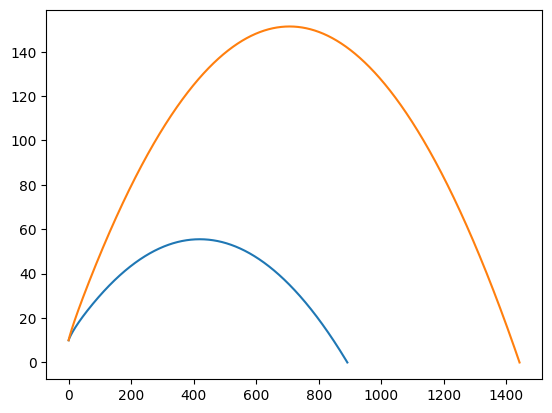

In [ ]:

rocket1 = Rocket(0, 10, 60)
rocket2 = Rocket(0, 10, 65)

while not (rocket1.crash and rocket2.crash):
    rocket1.update()
    rocket2.update()
    TIME += 1/FPS

plt.plot(rocket1.X, rocket1.Y)
plt.plot(rocket2.X, rocket2.Y)
